<b>Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [1]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.13.0'

<b>Q2. Load the Wine Quality dataset and explore its dimensions.

In [3]:
import pandas as pd
df = pd.read_csv('wine.csv')

<b>Q3. Check for null values, identify categorical variables, and encode them.



In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder
Encoder = LabelEncoder()


In [6]:
df['quality'] = Encoder.fit_transform(df['quality'])

In [7]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


<b>Q4. Separate the features and target variables from the dataset.

In [8]:
X = df.drop(['quality'],axis = 1)
y = df['quality']

<b>Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42 )

In [11]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
cv = KFold(n_splits = 5,shuffle = True,random_state = 42)
cross_val_score(LogisticRegression(),X_train,y_train,cv = cv)

array([0.78515625, 0.7734375 , 0.7265625 , 0.7421875 , 0.69411765])

<b>Q6. Scale the dataset using an appropriate scaling technique.

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

<B>Q7. Design and implement at least two hidden layers and an output layer for the binary categorical
variables.

<b>Q8. Create a Sequential model in Keras and add the previously designed layers to it.

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [14]:
model = Sequential()
model.add(Dense(11,activation = 'relu',input_dim = 11))
model.add(Dense(11,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

<b>Q9. Print the summary of the model architecture.

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<b>Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.

<b>Q11. Compile the model with the specified loss function, optimizer, and metrics.

In [17]:
model.compile(loss = 'binary_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])

<b>Q12. Fit the model to the training data using appropriate batch size and number of epochs.

In [18]:
history = model.fit(X_train_scl,y_train,epochs =50,validation_split = 0.2,batch_size = 20)

Epoch 1/50
52/52 [==============================] - 1s 4ms/step - loss: 0.6848 - accuracy: 0.5953 - val_loss: 0.6470 - val_accuracy: 0.6797
Epoch 2/50
52/52 [==============================] - 0s 2ms/step - loss: 0.6515 - accuracy: 0.6696 - val_loss: 0.6040 - val_accuracy: 0.7344
Epoch 3/50
52/52 [==============================] - 0s 2ms/step - loss: 0.6204 - accuracy: 0.7058 - val_loss: 0.5649 - val_accuracy: 0.7812
Epoch 4/50
52/52 [==============================] - 0s 2ms/step - loss: 0.5951 - accuracy: 0.7243 - val_loss: 0.5311 - val_accuracy: 0.7930
Epoch 5/50
52/52 [==============================] - 0s 2ms/step - loss: 0.5746 - accuracy: 0.7302 - val_loss: 0.5081 - val_accuracy: 0.7969
Epoch 6/50
52/52 [==============================] - 0s 2ms/step - loss: 0.5604 - accuracy: 0.7302 - val_loss: 0.4886 - val_accuracy: 0.7969
Epoch 7/50
52/52 [==============================] - 0s 2ms/step - loss: 0.5485 - accuracy: 0.7419 - val_loss: 0.4736 - val_accuracy: 0.8047
Epoch 8/50
52/52 [==

<b>Q13 Obtain the model's parameters (weights and biases).

In [22]:
model.get_weights()


[array([[ 3.85162920e-01,  1.01723872e-01,  3.02582026e-01,
         -3.11099231e-01,  5.62576592e-01, -4.83223617e-01,
         -2.31116563e-01, -4.54704463e-02, -3.65681364e-03,
         -3.77731234e-01,  2.73905426e-01],
        [-2.36198958e-02, -5.47117651e-01, -8.24767277e-02,
          4.33992475e-01,  4.64495957e-01,  4.66914088e-01,
          3.30985785e-01, -2.19284311e-01,  4.46520484e-04,
          5.18082559e-01,  2.37140059e-01],
        [ 4.84215975e-01, -6.04864895e-01, -1.15079366e-01,
          4.78523850e-01, -4.04541194e-01,  1.76340908e-01,
         -4.92762893e-01, -4.07269418e-01, -3.02971840e-01,
          6.43907040e-02,  3.46314400e-01],
        [ 2.41862293e-02, -4.50537205e-01,  7.42367983e-01,
         -3.62487823e-01,  4.96864855e-01,  4.09576565e-01,
         -2.70721883e-01,  1.61217570e-01,  4.12604481e-01,
          1.53592303e-01,  2.22678721e-01],
        [-8.69041532e-02,  6.25281706e-02, -4.12218869e-02,
          7.88970664e-02, -6.03000939e-01, -

<b>Q14. Store the model's training history as a Pandas DataFrame.

In [23]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.684786,0.595308,0.646999,0.679688
1,0.651478,0.669599,0.604010,0.734375
2,0.620417,0.705767,0.564874,0.781250
3,0.595121,0.724340,0.531133,0.792969
4,0.574640,0.730205,0.508058,0.796875
5,0.560415,0.730205,0.488634,0.796875
6,0.548507,0.741935,0.473554,0.804688
7,0.539971,0.744868,0.462002,0.800781
8,0.533781,0.748778,0.457656,0.812500
9,0.529196,0.752688,0.452862,0.808594


<b>Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.

<Axes: >

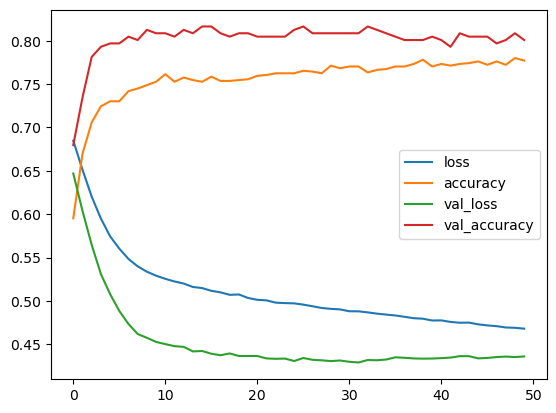

In [24]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot()

<b>Q16. Evaluate the model's performance using the test dataset and report relevant metrics.

In [25]:
model.evaluate(X_test_scl,y_test)

10/10 [==============================] - 0s 1ms/step - loss: 0.4985 - accuracy: 0.7594


[0.49846965074539185, 0.7593749761581421]